In [2]:
import os, sys
currentFolder = os.path.abspath('')
try:
    sys.path.remove(str(currentFolder))
except ValueError: # Already removed
    pass

projectFolder = 'C:/Users/abjawad/Documents/GitHub/junction-art'
sys.path.append(str(projectFolder))
os.chdir(projectFolder)
print( f"current working dir{os.getcwd()}")

current working dirC:\Users\abjawad\Documents\GitHub\junction-art


In [3]:
import junctionart.extensions as extensions
from junctionart.junctions.StraightRoadBuilder import StraightRoadBuilder
from junctionart.extensions.CountryCodes import CountryCodes
import matplotlib.pyplot as plt
import numpy as np
from junctionart.draw.ODRPlot import ODRPlot
import math
from junctionart.junctions.StandardCurveTypes import StandardCurveTypes
from sympy import Point, Line
from junctionart.junctions.JunctionBuilderFromPointsAndHeading import JunctionBuilderFromPointsAndHeading

number of roads  16





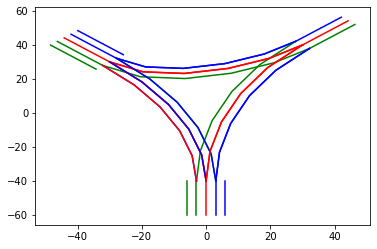

In [4]:
junctionBuilder = JunctionBuilderFromPointsAndHeading()
threePoints = [
              [-30,  30, math.radians(135)],
              [ 30,  40, math.radians(45)],
              [  0,  -40,  math.radians(270)]
            #   [ -30, -30, math.radians(225)]
              ]

odr = junctionBuilder.createIntersectionFromPoints(odrID=0,
                                                   points=threePoints,
                                                   straightRoadLen=20,
                                                   maxLanePerSide=2,
                                                   minLanePerSide=1)

odr_plot = ODRPlot(odr)
number_of_roads = len(odr.roads)
print('number of roads ', number_of_roads)
odr_plot.draw_odr(3)


intersection area  1172.9112234664112


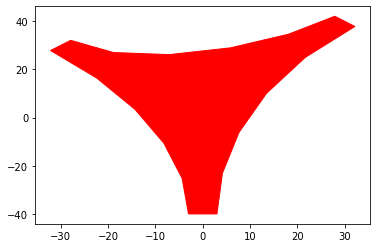

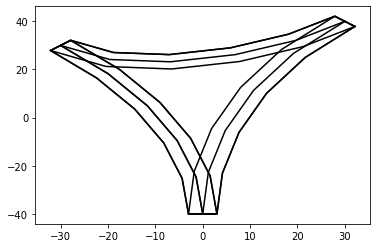

road id : area diff  1 3 -133.18108728910266
road id : area diff  1 5 -76.34626826563436
road id : area diff  1 6 201.86595800437624
road id : area diff  1 7 153.26947729574786
road id : area diff  1 8 160.2977885061003
road id : area diff  1 9 131.8903965291533
road id : area diff  3 5 56.8348190234683
road id : area diff  3 6 335.0470452934789
road id : area diff  3 7 286.45056458485055
road id : area diff  3 8 293.47887579520295
road id : area diff  3 9 265.07148381825596
road id : area diff  5 6 278.2122262700106
road id : area diff  5 7 229.61574556138223
road id : area diff  5 8 236.64405677173465
road id : area diff  5 9 208.23666479478766
road id : area diff  6 7 -48.59648070862838
road id : area diff  6 8 -41.56816949827595
road id : area diff  6 9 -69.97556147522295
road id : area diff  7 8 7.0283112103524275


AttributeError: 'MultiPolygon' object has no attribute 'exterior'

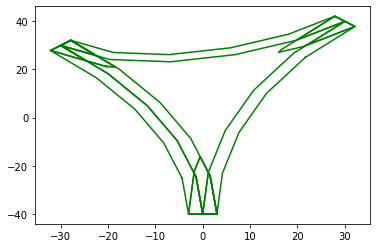

In [5]:
odr_plot.draw_intersection_area()
odr_plot.draw_road_polygon()
odr_plot.draw_conflict_zone_polygon()

In [ ]:

coordinate = []
for key in odr.roads:
    road = odr.roads.get(key)
    if road.curveType == StandardCurveTypes.Line:
        print(road.id)
    elif road.curveType == StandardCurveTypes.Poly:
        # print(road.id)
        start_coordinate = road.planview.get_start_point()
        end_coordinate = road.planview.get_end_point()
        coordinate.append(start_coordinate)
        coordinate.append(end_coordinate)
        # print(start_coordinate, end_coordinate)
        # np.append(points, [start_coordinate[0], start_coordinate[1]])
        # np.append(points, [end_coordinate[0], end_coordinate[1]])
# print(len(coordinate))
array_size = len(coordinate)
points = np.empty((array_size, 2))
for i in range(0, array_size):
    points[i][0], points[i][1] = coordinate[i][0], coordinate[i][1]
print(points)

In [ ]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import numpy as np
# rng = np.random.default_rng()
# points = rng.random((30, 2))   # 30 random points in 2-D
# print(points)
hull = ConvexHull(points)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')


In [ ]:
import shapely
from shapely.geometry import Polygon
polygon = Polygon(points)
# print(polygon)
print(polygon.area)

In [ ]:
polygon1 = shapely.geometry.Polygon([(0, 0), (0.5, 0.5), (1,0)]).buffer(0.01)
x, y = polygon1.exterior.xy
print(x, y)
plt.plot(x, y)
print(polygon1)